<h1><center>Economics of Careers in Data</center></h1>



This dataset is perfect for providing insight to these questions. It is the perfect dataset to demonstrate some ANOVA tests and learn more about the differences between the three major data careers, Data Science, Engineering, and Analytics.

I made heavy use of this article on ANOVA in python because I needed some refreshing. https://www.reneshbedre.com/blog/anova.html

Huge thanks to [@ruchi](https://www.kaggle.com/ruchi798) for providing this awesome dataset [Data Science Jobs and salaries](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries).


<h2 style='background: #41f0c4; border-radius: 10px; color: white;\'><center>Table of Contents </center></h2>


* [Import](#chapter1)
* [Preprocessing](#chapter2)
* [Remote Work](#chapter3)
* [Salary Distributions](#chapter4)
* [One Way Anova](#chapter5)
* [Two Way Anova](#chapter6)
* [Conclusions](#chapter7)
   

# Import <a id="chapter1"></a>

In [1]:
from IPython.utils import io
with io.capture_output() as captured:
    !pip install bioinfokit

In [2]:
#Set up environment
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [3]:
raw_data = pd.read_csv('/kaggle/input/data-science-job-salaries/ds_salaries.csv')

# Preprocessing <a id="chapter2"></a>

In [4]:
raw_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
print("Rows & Columns")
print(raw_data.shape)

Rows & Columns
(607, 12)


In [6]:
raw_data.work_year.unique()

array([2020, 2021, 2022])

In [7]:
raw_data.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

Yikes...

In [8]:
#Clean Career Values

#ML Engineer -> Machine Learning Engineer
mask = raw_data['job_title'] == 'ML Engineer'
raw_data.loc[mask, 'job_title_clean'] = 'Machine Learning Engineer'

mask = raw_data['job_title'] == 'NLP Engineer'
raw_data.loc[mask, 'job_title_clean'] = 'Machine Learning Engineer'

mask = raw_data['job_title'] == 'Machine Learning Developer'
raw_data.loc[mask, 'job_title_clean'] = 'Machine Learning Engineer'

mask = raw_data.job_title.str.contains('Machine Learning')
raw_data.loc[mask, 'job_title_clean'] = 'Machine Learning Engineer'

mask = raw_data.job_title.str.contains('Machine Learning Scientist')
raw_data.loc[mask, 'job_title_clean'] = 'Machine Learning Engineer'

#Data Scientist
mask = raw_data.job_title.str.contains('Data Scientist')
raw_data.loc[mask, 'job_title_clean'] = 'Data Scientist'

#Data Analyst
mask = raw_data.job_title.str.contains('Data Analyst')
raw_data.loc[mask, 'job_title_clean'] = 'Data Analyst'

#Data Engineer
mask = raw_data.job_title.str.contains('Data Engineer')
raw_data.loc[mask, 'job_title_clean'] = 'Data Engineer'

#Manager
mask = raw_data.job_title.str.contains('Manager')
raw_data.loc[mask, 'job_title_clean'] = 'Manager'

mask = raw_data.job_title.str.contains('Lead')
raw_data.loc[mask, 'job_title_clean'] = 'Manager'

mask = raw_data.job_title.str.contains('Director')
raw_data.loc[mask, 'job_title_clean'] = 'Manager'

mask = raw_data.job_title.str.contains('Head')
raw_data.loc[mask, 'job_title_clean'] = 'Manager'

In [9]:
raw_data.job_title_clean.value_counts()

Data Scientist               156
Data Engineer                145
Data Analyst                 116
Machine Learning Engineer     66
Manager                       58
Name: job_title_clean, dtype: int64

Much better!!

In [10]:
#Transform salaries into classified by job type
mask = raw_data['job_title_clean'] == 'Data Scientist'
raw_data.loc[mask, 'ds_usd_salary'] = raw_data['salary_in_usd']

mask = raw_data['job_title_clean'] == 'Data Engineer'
raw_data.loc[mask, 'de_usd_salary'] = raw_data['salary_in_usd']

mask = raw_data['job_title_clean'] == 'Data Analyst'
raw_data.loc[mask, 'da_usd_salary'] = raw_data['salary_in_usd']

mask = raw_data['job_title_clean'] == 'Machine Learning Engineer'
raw_data.loc[mask, 'ml_usd_salary'] = raw_data['salary_in_usd']

mask = raw_data['job_title_clean'] == 'Manager'
raw_data.loc[mask, 'ma_usd_salary'] = raw_data['salary_in_usd']

In [11]:
raw_data.remote_ratio.value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [12]:
mask = (raw_data['remote_ratio'] == 50) | (raw_data['remote_ratio'] == 0)
raw_data.loc[mask, 'remote_ratio_c'] = 0
raw_data.loc[~mask, 'remote_ratio_c'] = 100


In [13]:
raw_data.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [14]:
raw_data.employee_residence.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [15]:
raw_data.employee_residence.value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

In [16]:
#US ONLY
us_only = raw_data[raw_data['employee_residence'] == 'US']
#US JOBS
us_ds = us_only[us_only['job_title_clean'] == 'Data Scientist']
us_de = us_only[us_only['job_title_clean'] == 'Data Engineer']
us_da = us_only[us_only['job_title_clean'] == 'Data Analyst']
us_ml = us_only[us_only['job_title_clean'] == 'Machine Learning Engineer']
us_ma = us_only[us_only['job_title_clean'] == 'Manager']

#US EXPERIENCE
us_en = us_only[us_only['experience_level'] == 'EN']
us_mi = us_only[us_only['experience_level'] == 'MI']
us_se = us_only[us_only['experience_level'] == 'SE']
us_ex = us_only[us_only['experience_level'] == 'EX']


#US COMPANY SIZE
us_l = us_only[us_only['company_size'] == 'L']
us_m = us_only[us_only['company_size'] == 'M']
us_s = us_only[us_only['company_size'] == 'S']



us_2020 = us_only[us_only['work_year'] == 2020]
us_2021 = us_only[us_only['work_year'] == 2021]
us_2022 = us_only[us_only['work_year'] == 2022]



In [17]:
#UK ONLY
uk_only = raw_data[raw_data['employee_residence'] == 'GB']
uk_ds = uk_only[uk_only['job_title_clean'] == 'Data Scientist']
uk_de = uk_only[uk_only['job_title_clean'] == 'Data Engineer']
uk_da = uk_only[uk_only['job_title_clean'] == 'Data Analyst']
uk_ml = uk_only[uk_only['job_title_clean'] == 'Machine Learning Engineer']
uk_ma = uk_only[uk_only['job_title_clean'] == 'Manager']

uk_2020 = uk_only[uk_only['work_year'] == 2020]
uk_2021 = uk_only[uk_only['work_year'] == 2021]
uk_2022 = uk_only[uk_only['work_year'] == 2022]

# Remote Work (All Countries) <a id="chapter3"></a>

Since this data potentially pre-pandemic data I'm curious if there will be differences across the years in remote work.

In [18]:
raw_2020 = raw_data[raw_data.work_year == 2020]
raw_2021 = raw_data[raw_data.work_year == 2021]
raw_2022 = raw_data[raw_data.work_year == 2022]

In [19]:
print(raw_2020.shape)
print(raw_2021.shape)
print(raw_2022.shape)

(72, 19)
(217, 19)
(318, 19)


Text(0, 0.5, 'Frequency')

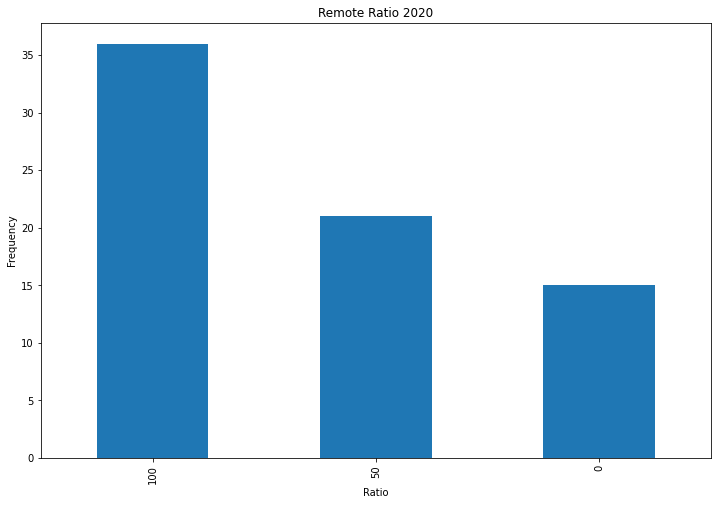

In [20]:
year = 2020
df = raw_data[raw_data.work_year == year]
ax = df['remote_ratio'].value_counts().plot(kind='bar',
                                    figsize=(12,8),title="Remote Ratio 2020")
ax.set_xlabel("Ratio")
ax.set_ylabel("Frequency")


Text(0, 0.5, 'Frequency')

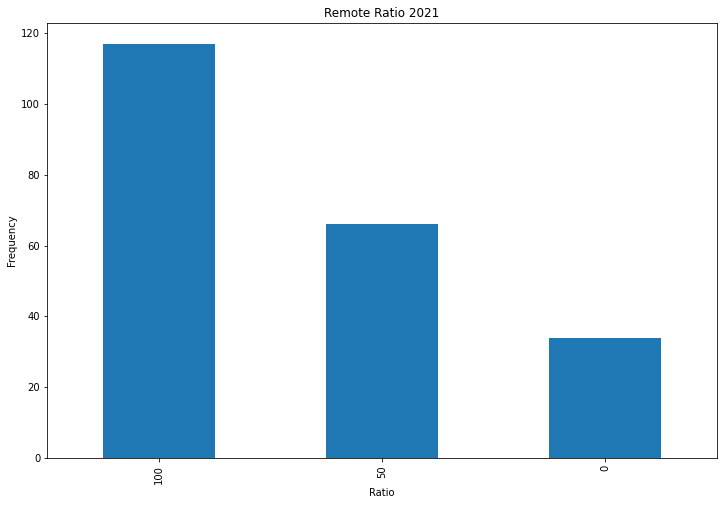

In [21]:
year = 2021
df = raw_data[raw_data.work_year == year]
ax = df['remote_ratio'].value_counts().plot(kind='bar',
                                    figsize=(12,8),title="Remote Ratio 2021")
ax.set_xlabel("Ratio")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

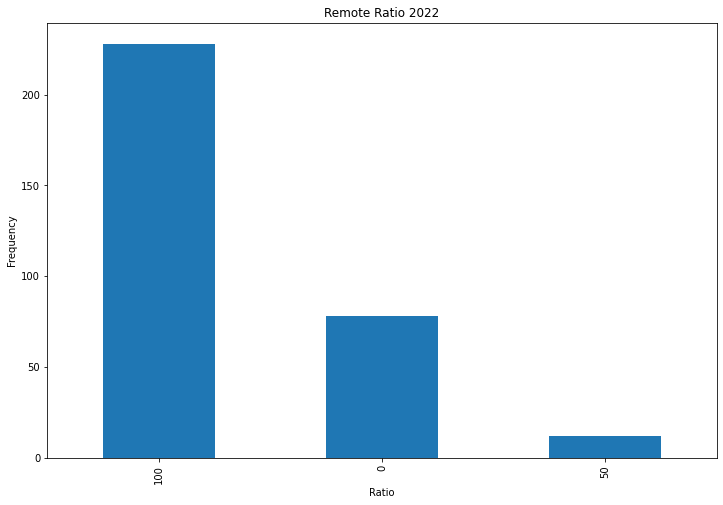

In [22]:
year = 2022
df = raw_data[raw_data.work_year == year]
ax = df['remote_ratio'].value_counts().plot(kind='bar',
                                    figsize=(12,8),title="Remote Ratio 2022")
ax.set_xlabel("Ratio")
ax.set_ylabel("Frequency")

The shift toward 100% remote work can clearly be seen by the last two charts. We could even count the ratio value of '50' as technically in person. I made another column in the preprocessing step that does just that.

# Salary Distributions <a id="chapter4"></a>

In [23]:
#boilerplate histogram & Summary Stat function

def plot_salaries(df, title):
    d = pd.DataFrame(df['salary'].describe())
    display(d.head(8))
    _ = plt.figure(figsize=(15,8))
    _ = sns.displot(df['salary'], color='red', kde=True, label='train')
    _ = plt.xticks(rotation=45)
    _ = plt.title(title)
    _ = plt.xlabel('Salary')
    plt.show()

## Data Scientist

,salary
count,86.000000
mean,156916.860465
std,63924.965265
min,58000.000000
25%,120000.000000
50%,140400.000000
75%,180000.000000
max,416000.000000


<Figure size 1080x576 with 0 Axes>

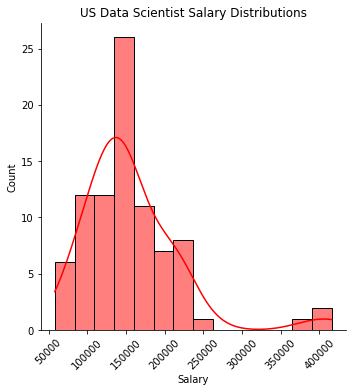

In [24]:
plot_salaries(us_ds, 'US Data Scientist Salary Distributions')

## Senior Data Scientists (My actual job title)

,salary
count,56.000000
mean,171850.000000
std,59873.178484
min,80000.000000
25%,139650.000000
50%,161600.000000
75%,210000.000000
max,412000.000000


<Figure size 1080x576 with 0 Axes>

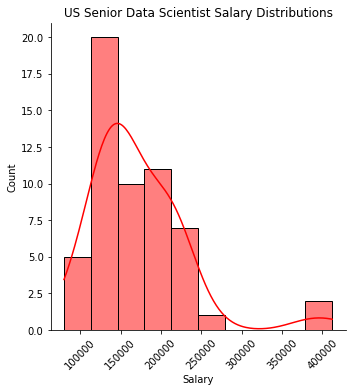

In [25]:
plot_salaries(us_ds[us_ds['experience_level'] == 'SE'], 'US Senior Data Scientist Salary Distributions')

## Data Engineer

,salary
count,86.000000
mean,148311.546512
std,70230.002917
min,25000.000000
25%,109100.000000
50%,140125.000000
75%,175075.000000
max,600000.000000


<Figure size 1080x576 with 0 Axes>

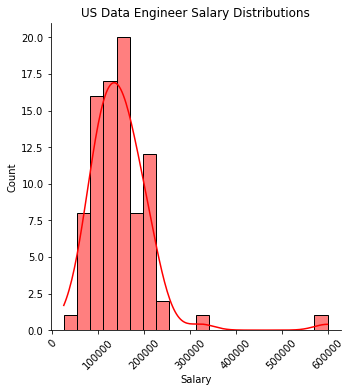

In [26]:
plot_salaries(us_de, 'US Data Engineer Salary Distributions')

## Data Analyst

,salary
count,78.000000
mean,112472.628205
std,50083.282064
min,50000.000000
25%,90080.000000
50%,105630.000000
75%,128968.750000
max,450000.000000


<Figure size 1080x576 with 0 Axes>

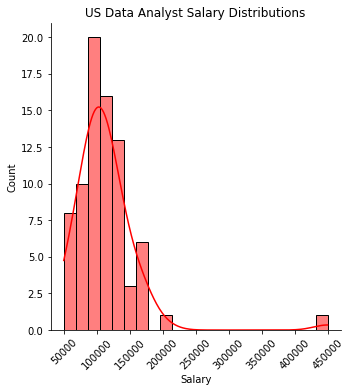

In [27]:
plot_salaries(us_da, 'US Data Analyst Salary Distributions')

## ML Engineer

,salary
count,27.000000
mean,188303.407407
std,67884.794241
min,81000.000000
25%,144000.000000
50%,189650.000000
75%,222500.000000
max,423000.000000


<Figure size 1080x576 with 0 Axes>

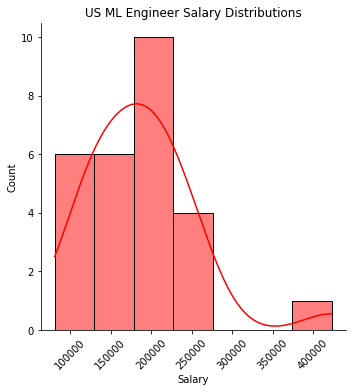

In [28]:
plot_salaries(us_ml, 'US ML Engineer Salary Distributions')

## Management

,salary
count,32.000000
mean,179937.437500
std,67462.568168
min,87000.000000
25%,143000.000000
50%,160171.000000
75%,206000.000000
max,405000.000000


<Figure size 1080x576 with 0 Axes>

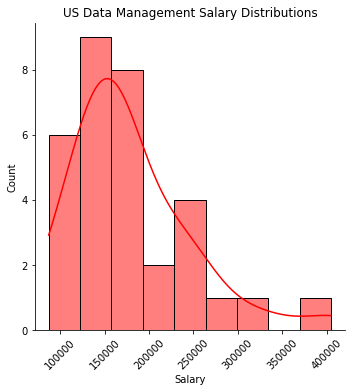

In [29]:
plot_salaries(us_ma, 'US Data Management Salary Distributions')

## UK Salaries (In GBP)

,salary
count,13.000000
mean,67992.307692
std,28973.276812
min,30000.000000
25%,50000.000000
50%,68000.000000
75%,80000.000000
max,140000.000000


<Figure size 1080x576 with 0 Axes>

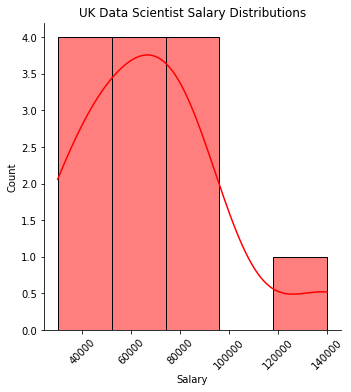

In [30]:
plot_salaries(uk_ds, 'UK Data Scientist Salary Distributions')

,salary
count,19.000000
mean,62921.052632
std,16671.885148
min,35000.000000
25%,51250.000000
50%,60000.000000
75%,75000.000000
max,90000.000000


<Figure size 1080x576 with 0 Axes>

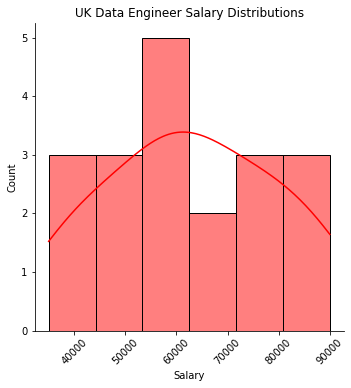

In [31]:
plot_salaries(uk_de, 'UK Data Engineer Salary Distributions')

,salary
count,6.000000
mean,39576.000000
std,7146.933328
min,30000.000000
25%,35614.000000
50%,38728.000000
75%,43750.000000
max,50000.000000


<Figure size 1080x576 with 0 Axes>

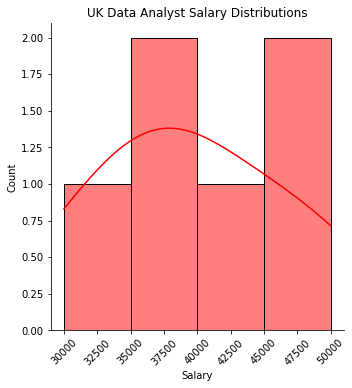

In [32]:
plot_salaries(uk_da, 'UK Data Analyst Salary Distributions')

The main takeaway here is that there isn't enough data to draw any concrete conclusions among the different careers between the US and UK. I'm going to just stick with the US data for the majority of statistical tests.

# Experience Level US

,salary
count,29.000000
mean,98706.896552
std,44718.068664
min,50000.000000
25%,72000.000000
50%,90000.000000
75%,105000.000000
max,250000.000000


<Figure size 1080x576 with 0 Axes>

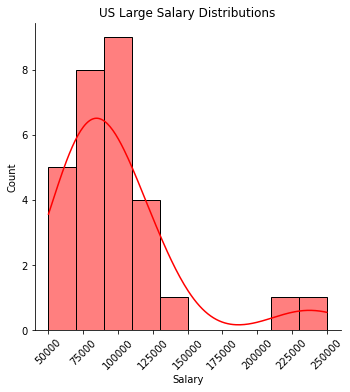

In [33]:
#ENTRY
plot_salaries(us_en, 'US Large Salary Distributions')

,salary
count,77.000000
mean,138251.090909
std,75067.819445
min,50000.000000
25%,99100.000000
50%,120000.000000
75%,153000.000000
max,450000.000000


<Figure size 1080x576 with 0 Axes>

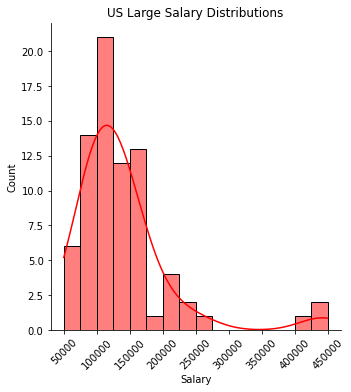

In [34]:
#MID
plot_salaries(us_mi, 'US Large Salary Distributions')

,salary
count,211.000000
mean,153921.810427
std,52963.796332
min,25000.000000
25%,118075.000000
50%,150000.000000
75%,180970.000000
max,412000.000000


<Figure size 1080x576 with 0 Axes>

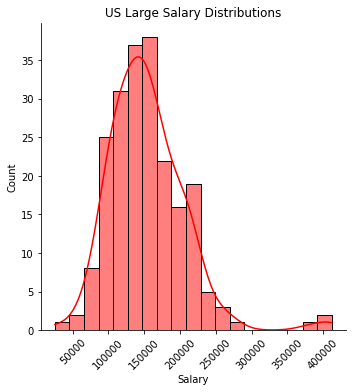

In [35]:
#SENIOR
plot_salaries(us_se, 'US Large Salary Distributions')

,salary
count,15.000000
mean,249991.666667
std,126878.038903
min,110000.000000
25%,171437.500000
50%,224000.000000
75%,287000.000000
max,600000.000000


<Figure size 1080x576 with 0 Axes>

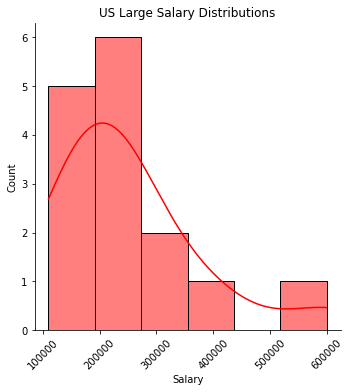

In [36]:
#EXECUTIVE
plot_salaries(us_ex, 'US Large Salary Distributions')



### Company Size 

,salary
count,100.000000
mean,170125.000000
std,89344.885475
min,58000.000000
25%,111500.000000
50%,151500.000000
75%,200000.000000
max,600000.000000


<Figure size 1080x576 with 0 Axes>

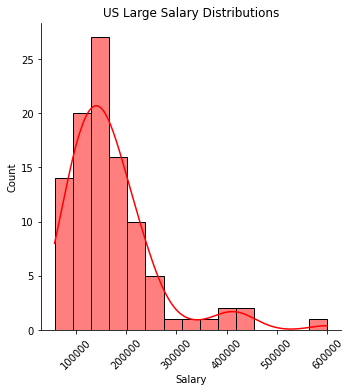

In [37]:
#LARGE
plot_salaries(us_l, 'US Large Salary Distributions')

,salary
count,211.000000
mean,143119.483412
std,50859.496689
min,25000.000000
25%,109040.000000
50%,136620.000000
75%,168937.500000
max,450000.000000


<Figure size 1080x576 with 0 Axes>

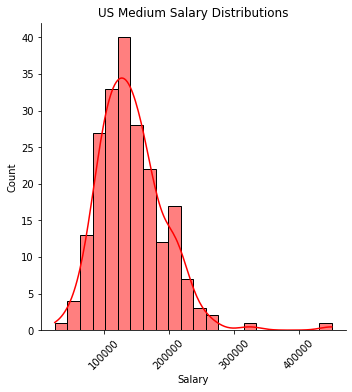

In [38]:
#MEDIUM
plot_salaries(us_m, 'US Medium Salary Distributions')

,salary
count,21.000000
mean,120214.285714
std,82545.528563
min,55000.000000
25%,81000.000000
50%,100000.000000
75%,120000.000000
max,416000.000000


<Figure size 1080x576 with 0 Axes>

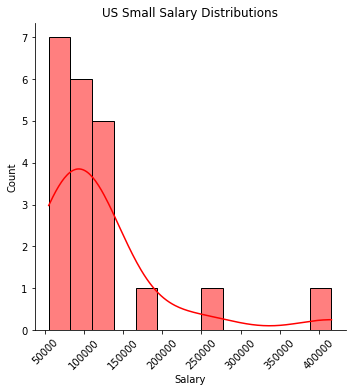

In [39]:
#SMALL
plot_salaries(us_s, 'US Small Salary Distributions')

## Separate Years

,salary
count,25.000000
mean,157462.000000
std,100855.450687
min,70000.000000
25%,100000.000000
50%,118000.000000
75%,188000.000000
max,450000.000000


<Figure size 1080x576 with 0 Axes>

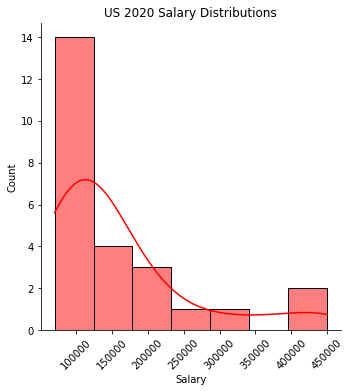

In [40]:
#2020
plot_salaries(us_2020, 'US 2020 Salary Distributions')

,salary
count,87.000000
mean,155562.356322
std,90077.086486
min,50000.000000
25%,96575.000000
50%,140000.000000
75%,185000.000000
max,600000.000000


<Figure size 1080x576 with 0 Axes>

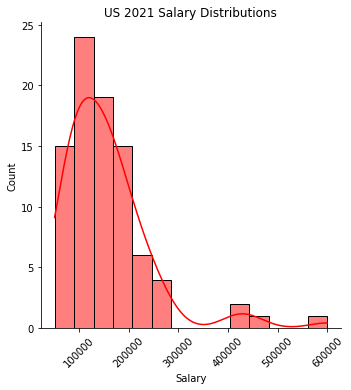

In [41]:
#2021
plot_salaries(us_2021, 'US 2021 Salary Distributions')

,salary
count,220.000000
mean,146657.890909
std,51922.453370
min,25000.000000
25%,112900.000000
50%,140000.000000
75%,170000.000000
max,405000.000000


<Figure size 1080x576 with 0 Axes>

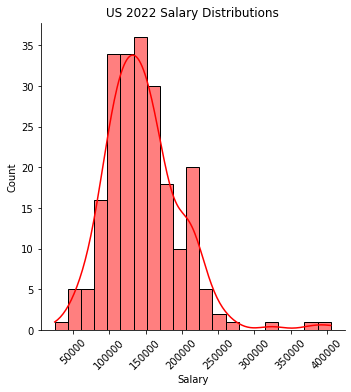

In [42]:
#2022
plot_salaries(us_2022, 'US 2022 Salary Distributions')

# One Way Anova <a id="chapter5"></a>

For the upcoming ANOVA procedures, I created generic functions that will run the test and check the assumptions. There are three main assumptions that are checked:

- Standardized residuals are normally distributed (Shapiro-Wilk test & QQ Plot)

- Homogeneity of variances (Bartlett and Levene tests)

The Bartlett test checks the distributions of variances assuming the data comes from a normal distribution. The Levene test checks the distributions of variances assuming the data does not come from a normal distribution. If both null hypotheses are rejected, we can say that the variance assumption is not met. If at minimum we can get Levene's to not reject, then we can say the variance assumption is met.

## Data Science Vs Data Engineering Vs Data Analytics

In [43]:
#Split a given dataframe into data science, eng, an
def split_data_jobs(df):
    df_ds = df[df['job_title_clean'] == 'Data Scientist']
    df_de = df[df['job_title_clean'] == 'Data Engineer']
    df_da = df[df['job_title_clean'] == 'Data Analyst']
    
    treat=pd.concat([df_ds.salary_in_usd, df_de.salary_in_usd, df_da.salary_in_usd],axis=1, ignore_index=True)
    treat.columns = ['ds', 'de', 'da']
    
    df_melt = pd.melt(treat.reset_index(), id_vars=['index'], value_vars=['ds', 'de', 'da'])
    # replace column names
    df_melt.columns = ['index', 'treatments', 'value']
    return df_melt

In [44]:
def runOneWayAnova(df_melt, checkAssumptions=False):

    ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#2ac7c2')
    ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
    plt.show()
    
    # Ordinary Least Squares (OLS) model
    model = ols('value ~ C(treatments)', data=df_melt).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
    
    if checkAssumptions:
        # QQ-plot
        res = stat()
        res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
        sm.qqplot(res.anova_std_residuals, line='45')
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Standardized Residuals")
        plt.show()

        # histogram
        plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
        plt.xlabel("Residuals")
        plt.ylabel('Frequency')
        plt.show()
        
        #Check Residuals
        w, pvalue = stats.shapiro(model.resid)
        print("Shapiro-Wilk")
        print(w, pvalue)
        
        #Check Variances (Bartlett)
        res = stat()
        res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
        print("Bartlett")
        print(res.bartlett_summary)
        
        #Check Variances (Levene)
        res = stat()
        res.levene(df=df_melt, res_var='value', xfac_var='treatments')
        print("Levene")
        print(res.levene_summary)
    
    if anova_table['PR(>F)'][0] < 0.05:
        res = stat()
        res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
        print("Tukey Procedure")
        print(res.tukey_summary)

In [45]:
us_melt = split_data_jobs(us_only)
us_only.job_title_clean.value_counts()

Data Engineer                86
Data Scientist               86
Data Analyst                 78
Manager                      32
Machine Learning Engineer    27
Name: job_title_clean, dtype: int64

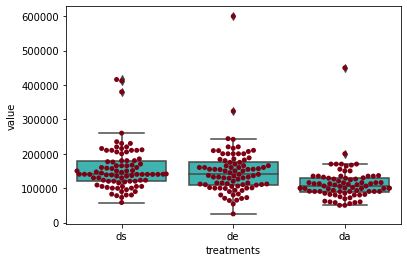

                     sum_sq     df         F    PR(>F)
C(treatments)  8.965549e+10    2.0  11.53708  0.000016
Residual       9.597274e+11  247.0       NaN       NaN


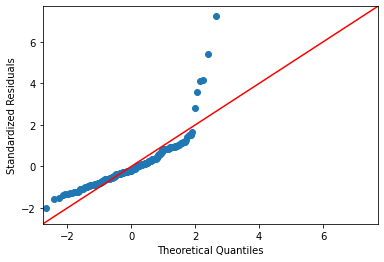

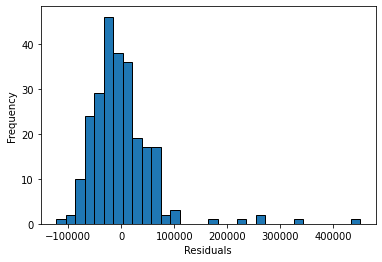

Shapiro-Wilk
0.7804480791091919 5.084879403071699e-18
Bartlett
                 Parameter   Value
0      Test statistics (T)  9.0894
1  Degrees of freedom (Df)  2.0000
2                  p value  0.0106
Levene
                 Parameter   Value
0      Test statistics (W)  2.3436
1  Degrees of freedom (Df)  2.0000
2                  p value  0.0981
Tukey Procedure
  group1 group2          Diff         Lower         Upper   q-value   p-value
0     ds     de   8605.313953 -13810.168173  31020.796080  1.280237  0.626458
1     ds     da  44444.232260  21461.179754  67427.284766  6.448809  0.001000
2     de     da  35838.918306  12855.865800  58821.970813  5.200188  0.001000


In [46]:
runOneWayAnova(us_melt, checkAssumptions=True)


The tests show that there are a lot of outliers in the full dataset which could potentially violate the residual assumption. The Shapiro test is significant at the 0.05 level and the null hypothesis that the data is normally distributed. So we possibly have too much of a violation of normality of residuals. Levene's is not significant at a 0.05 level so we can have some certainty around the distribution of variances meeting the required assumptions. But I do want to look at the current year (2022) because that is where most of the data comes from.

## Accounting for Year

In [47]:
us_2022 = us_only[us_only['work_year'] == 2022]
us_2022_melt = split_data_jobs(us_2022)

In [48]:
us_2022.job_title_clean.value_counts()

Data Engineer                64
Data Scientist               60
Data Analyst                 57
Machine Learning Engineer    13
Manager                      12
Name: job_title_clean, dtype: int64

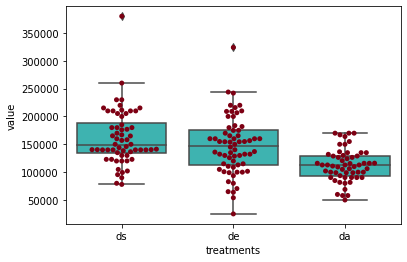

                     sum_sq     df          F        PR(>F)
C(treatments)  7.378676e+10    2.0  18.024478  7.442399e-08
Residual       3.643391e+11  178.0        NaN           NaN


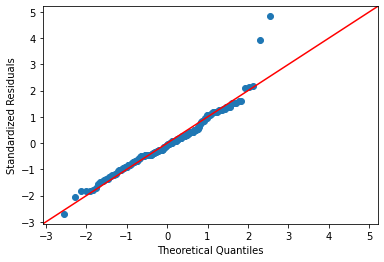

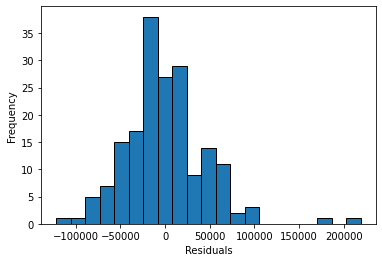

Shapiro-Wilk
0.9525831937789917 9.336591574538033e-06
Bartlett
                 Parameter    Value
0      Test statistics (T)  21.0625
1  Degrees of freedom (Df)   2.0000
2                  p value   0.0000
Levene
                 Parameter   Value
0      Test statistics (W)  5.6575
1  Degrees of freedom (Df)  2.0000
2                  p value  0.0041
Tukey Procedure
  group1 group2          Diff         Lower         Upper   q-value   p-value
0     ds     de  14275.500000  -4940.895698  33491.895698  2.483237  0.187729
1     ds     da  48936.578947  29157.476476  68715.681418  8.270388  0.001000
2     de     da  34661.078947  15185.428420  54136.729475  5.949068  0.001000


In [49]:
runOneWayAnova(us_2022_melt, checkAssumptions=True)

The QQ plot has a much better appearance for the 2022 data. We still get a significant p value for the Shapiro test and we get even more significant p-values for the Bartlett and Levene tests. From the box plots we can see a much more pronounced difference in the distributions. These test results probably don't mean much given the problems with the assumptions, however both tests came to the same conclusion. The tests show that there is a significant difference between the salaries of Data Scientists vs Data Analysts as well as Data Engineers vs Data Analysts. But not between Data Engineers and Scientists.

The next set of tests evaluate the use of this same test on the 2021 and 2020 data.

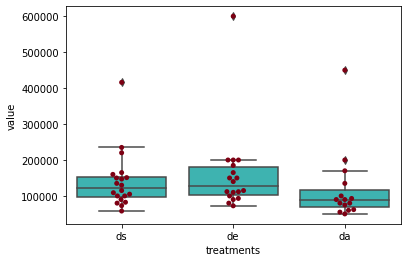

                     sum_sq    df         F    PR(>F)
C(treatments)  1.332650e+10   2.0  0.669381  0.516554
Residual       4.977176e+11  50.0       NaN       NaN


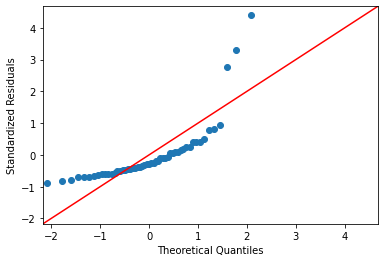

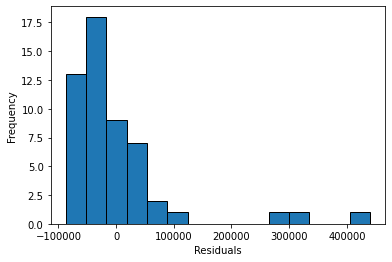

Shapiro-Wilk
0.6593220233917236 7.968656845491751e-10
Bartlett
                 Parameter   Value
0      Test statistics (T)  2.6995
1  Degrees of freedom (Df)  2.0000
2                  p value  0.2593
Levene
                 Parameter   Value
0      Test statistics (W)  0.0933
1  Degrees of freedom (Df)  2.0000
2                  p value  0.9111


In [50]:
us_2021_melt = split_data_jobs(us_2021)
runOneWayAnova(us_2021_melt, checkAssumptions=True)

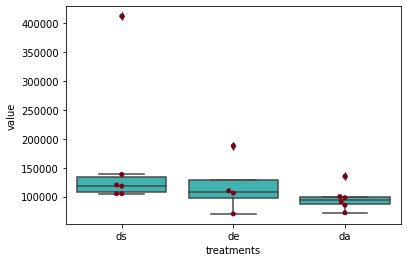

                     sum_sq    df         F    PR(>F)
C(treatments)  1.503090e+10   2.0  1.179799  0.338192
Residual       8.281144e+10  13.0       NaN       NaN


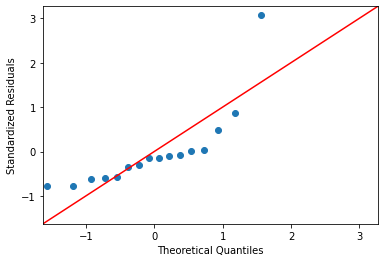

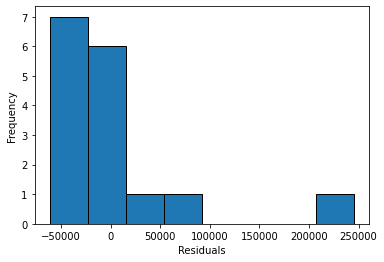

Shapiro-Wilk
0.6969069242477417 0.00015604407235514373
Bartlett
                 Parameter    Value
0      Test statistics (T)  10.7410
1  Degrees of freedom (Df)   2.0000
2                  p value   0.0047
Levene
                 Parameter   Value
0      Test statistics (W)  0.5032
1  Degrees of freedom (Df)  2.0000
2                  p value  0.6159


In [51]:
us_2020_melt = split_data_jobs(us_2020)
runOneWayAnova(us_2020_melt, checkAssumptions=True)

Although we have some better results with some of the assumption tests, there clearly isn't the same amount of data distributed across years which makes the 2020 and 2021 data inconclusive with the one way anova procedure. But we can take the somewhat significant result from the 2022 data and look at which other factors in the data could be influencing the differences in distributions.


# Company Size

In [52]:
def split_company_size(df):
    df_l = df[df['company_size'] == 'L']
    df_m = df[df['company_size'] == 'M']
    df_s = df[df['company_size'] == 'S']
    
    treat=pd.concat([df_l.salary_in_usd, df_m.salary_in_usd, df_s.salary_in_usd],axis=1, ignore_index=True)
    treat.columns = ['L', 'M', 'S']
    
    df_melt = pd.melt(treat.reset_index(), id_vars=['index'], value_vars=['L', 'M', 'S'])
    df_melt.columns = ['index', 'treatments', 'value']
    return df_melt

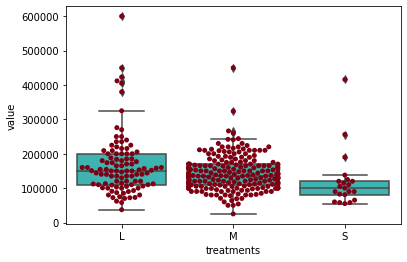

                     sum_sq     df         F    PR(>F)
C(treatments)  6.115585e+10    2.0  6.787695  0.001292
Residual       1.482114e+12  329.0       NaN       NaN


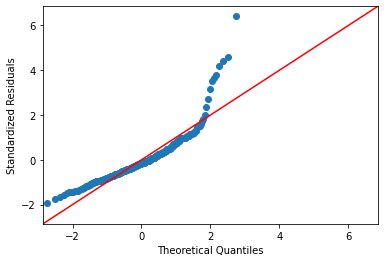

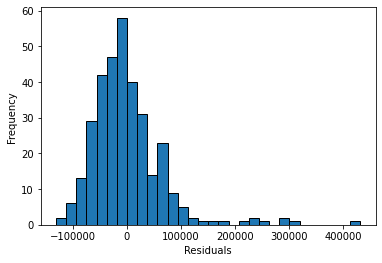

Shapiro-Wilk
0.8459872007369995 1.5045745326043405e-17
Bartlett
                 Parameter    Value
0      Test statistics (T)  49.5459
1  Degrees of freedom (Df)   2.0000
2                  p value   0.0000
Levene
                 Parameter   Value
0      Test statistics (W)  5.8174
1  Degrees of freedom (Df)  2.0000
2                  p value  0.0033
Tukey Procedure
  group1 group2          Diff         Lower         Upper   q-value   p-value
0      L      M  24977.876588   5792.170156  44163.583020  4.334996  0.006639
1      L      S  47883.074286   9949.665970  85816.482601  4.203114  0.008894
2      M      S  22905.197698 -13255.095686  59065.491083  2.109177  0.296862


In [53]:
#US ONLY COMPANY SIZE
cs_melt = split_company_size(us_only)
runOneWayAnova(cs_melt, checkAssumptions=True)


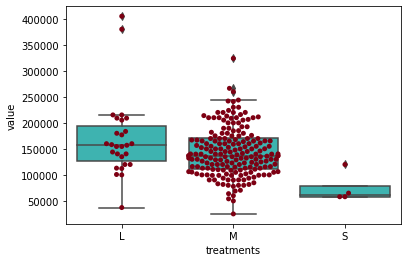

                     sum_sq     df         F    PR(>F)
C(treatments)  3.636106e+10    2.0  7.081329  0.001049
Residual       5.571236e+11  217.0       NaN       NaN


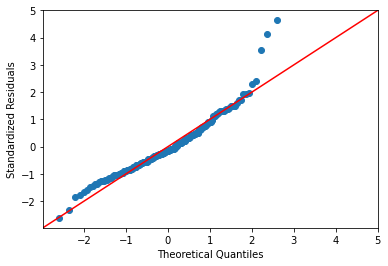

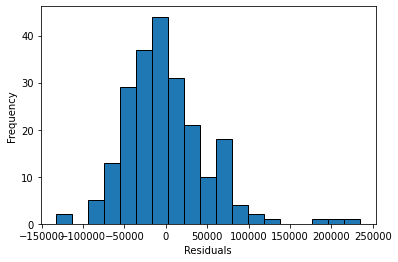

Shapiro-Wilk
0.9443805813789368 1.8459040518337133e-07
Bartlett
                 Parameter    Value
0      Test statistics (T)  14.8873
1  Degrees of freedom (Df)   2.0000
2                  p value   0.0006
Levene
                 Parameter   Value
0      Test statistics (W)  1.9793
1  Degrees of freedom (Df)  2.0000
2                  p value  0.1406
Tukey Procedure
  group1 group2          Diff         Lower          Upper   q-value   p-value
0      L      M  26121.248677   1518.523482   50723.973873  3.543635  0.034485
1      L      S  94647.629630  30580.083026  158715.176233  4.930715  0.001708
2      M      S  68526.380952   8105.523937  128947.237968  3.785377  0.021734


In [54]:
#US 2022 ONLY COMPANY SIZE
cs_2022_melt = split_company_size(us_2022)
runOneWayAnova(cs_2022_melt, checkAssumptions=True)

The first test breaks all the assumption tests so we can't really rely on that one. But the second test has more validity. However,there are significant results in both tests for Large/Medium, Large/Small, but not Mid/Small. I'm not suprised that Large was different from the other two but it seems like there isn't really a well-defined boundary between medium and small companies on salaries.

# Experience Level

In [55]:
us_only.experience_level.value_counts()


SE    211
MI     77
EN     29
EX     15
Name: experience_level, dtype: int64

In [56]:
def split_experience_lvl(df):
    df_en = df[df['experience_level'] == 'EN']
    df_mi = df[df['experience_level'] == 'MI']
    df_se = df[df['experience_level'] == 'SE']
    df_ex = df[df['experience_level'] == 'EX']
    
    treat=pd.concat([df_en.salary_in_usd, df_mi.salary_in_usd, df_se.salary_in_usd, df_ex.salary_in_usd],axis=1, ignore_index=True)
    treat.columns = ['EN', 'MI', 'SE', 'EX']
    
    df_melt = pd.melt(treat.reset_index(), id_vars=['index'], value_vars=['EN', 'MI', 'SE', 'EX'])
    df_melt.columns = ['index', 'treatments', 'value']
    return df_melt

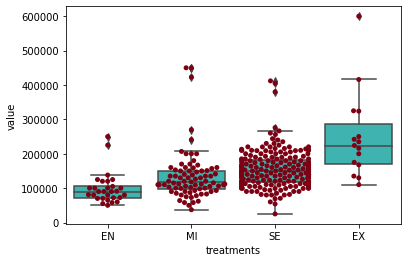

                     sum_sq     df          F        PR(>F)
C(treatments)  2.452305e+11    3.0  20.655663  2.773220e-12
Residual       1.298039e+12  328.0        NaN           NaN


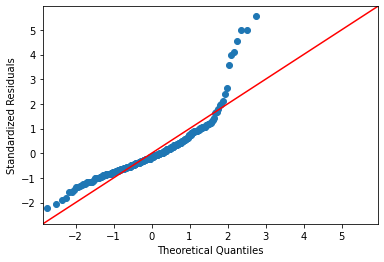

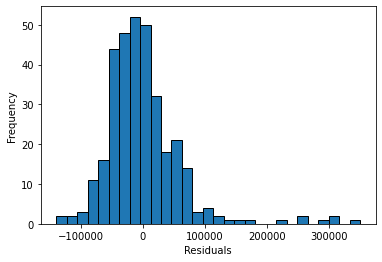

Shapiro-Wilk
0.8363921642303467 4.395486814644998e-18
Bartlett
                 Parameter    Value
0      Test statistics (T)  44.3961
1  Degrees of freedom (Df)   3.0000
2                  p value   0.0000
Levene
                 Parameter   Value
0      Test statistics (W)  5.0806
1  Degrees of freedom (Df)  3.0000
2                  p value  0.0019
Tukey Procedure
  group1 group2           Diff         Lower          Upper    q-value  \
0     EN     MI   36910.895656   1516.955618   72304.835695   3.808500   
1     EN     SE   55214.913875  23042.345394   87387.482356   6.267567   
2     EN     EX  151284.770115  99619.102044  202950.438186  10.693540   
3     MI     SE   18304.018219  -3324.660692   39932.697130   3.090614   
4     MI     EX  114373.874459  68525.571916  160222.177001   9.110283   
5     SE     EX   96069.856240  52660.064519  139479.647961   8.082166   

    p-value  
0  0.037216  
1  0.001000  
2  0.001000  
3  0.129271  
4  0.001000  
5  0.001000  


In [57]:
#US ONLY
ex_melt = split_experience_lvl(us_only)
runOneWayAnova(ex_melt, checkAssumptions=True)

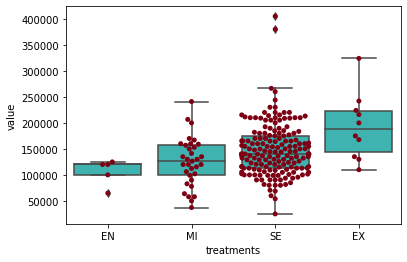

                     sum_sq     df         F    PR(>F)
C(treatments)  4.440616e+10    3.0  5.822927  0.000763
Residual       5.490785e+11  216.0       NaN       NaN


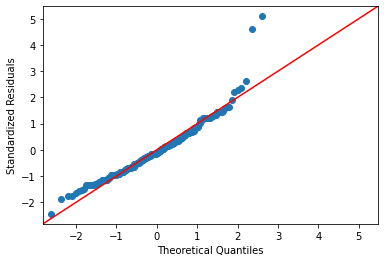

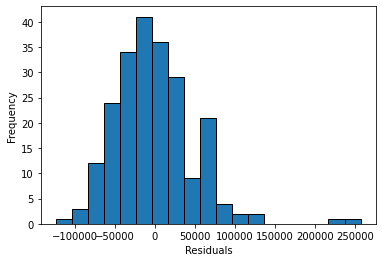

Shapiro-Wilk
0.937883198261261 4.6569180511824015e-08
Bartlett
                 Parameter   Value
0      Test statistics (T)  3.9928
1  Degrees of freedom (Df)  3.0000
2                  p value  0.2622
Levene
                 Parameter   Value
0      Test statistics (W)  1.0243
1  Degrees of freedom (Df)  3.0000
2                  p value  0.3827
Tukey Procedure
  group1 group2          Diff         Lower          Upper   q-value   p-value
0     EN     MI  19296.818182 -43352.702944   81946.339308  1.127874  0.837800
1     EN     SE  42100.593023 -17124.443482  101325.629529  2.603008  0.257322
2     EN     EX  86387.500000  14883.793136  157891.206864  4.423998  0.010705
3     MI     SE  22803.774841  -2006.048202   47613.597885  3.365702  0.084172
4     MI     EX  67090.681818  19966.351949  114215.011687  5.213263  0.001629
5     SE     EX  44286.906977   1821.098174   86752.715780  3.818814  0.037274


In [58]:
ex_melt = split_experience_lvl(us_2022)
runOneWayAnova(ex_melt, checkAssumptions=True)

Again with assumption problems here which isn't suprising. The Tukey procedure had significant results for Entry/Mid, Entry/Senior, Entry/Executive, Mid/Executive, and Senior/Executive. These results aren't all that groundbreaking, but its cool to see that they show up as significant across the US data even if some of the assumptions have issues.

# Remote Percentage

In [59]:
def split_remote_level(df):
    df_i = df[df['remote_ratio'] == 100]
    df_p = df[df['remote_ratio'] == 0]
    
    treat=pd.concat([df_i.salary_in_usd, df_p.salary_in_usd],axis=1, ignore_index=True)
    treat.columns = ['R', 'P']
    
    df_melt = pd.melt(treat.reset_index(), id_vars=['index'], value_vars=['R', 'P'])
    df_melt.columns = ['index', 'treatments', 'value']
    return df_melt



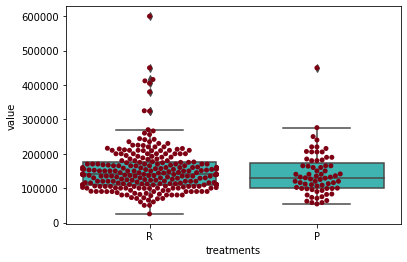

                     sum_sq     df         F    PR(>F)
C(treatments)  6.070241e+09    1.0  1.348457  0.246433
Residual       1.409007e+12  313.0       NaN       NaN


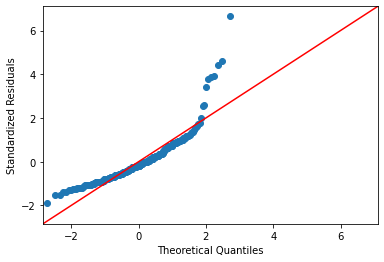

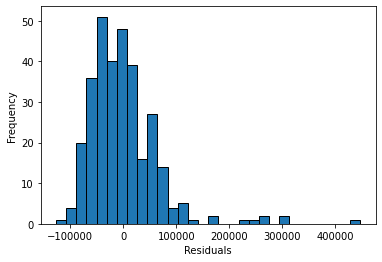

Shapiro-Wilk
0.8332947492599487 9.359807538569237e-18
Bartlett
                 Parameter   Value
0      Test statistics (T)  0.4088
1  Degrees of freedom (Df)  1.0000
2                  p value  0.5226
Levene
                 Parameter   Value
0      Test statistics (W)  0.0000
1  Degrees of freedom (Df)  1.0000
2                  p value  0.9951


In [60]:
rem_melt = split_remote_level(us_only)
runOneWayAnova(rem_melt, checkAssumptions=True)

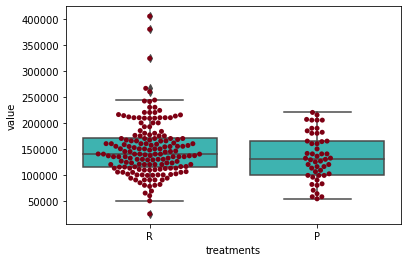

                     sum_sq     df         F    PR(>F)
C(treatments)  8.942189e+09    1.0  3.354182  0.068425
Residual       5.705202e+11  214.0       NaN       NaN


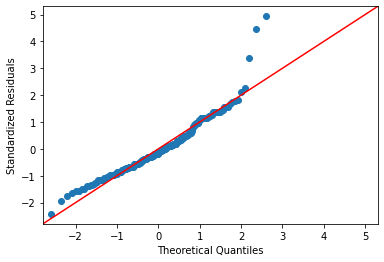

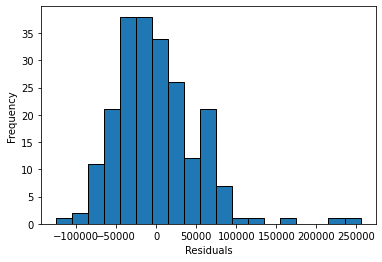

Shapiro-Wilk
0.933361291885376 2.3809793248119604e-08
Bartlett
                 Parameter   Value
0      Test statistics (T)  1.8652
1  Degrees of freedom (Df)  1.0000
2                  p value  0.1720
Levene
                 Parameter   Value
0      Test statistics (W)  0.0654
1  Degrees of freedom (Df)  1.0000
2                  p value  0.7984


In [61]:
rem_melt = split_remote_level(us_2022)
runOneWayAnova(rem_melt, checkAssumptions=True)

No significant difference in salary for the entire US cohort nor the 2022 isolated salaries. The assumption tests also had more promising results adding more validity to the results.

## UK VS US

In [62]:
def split_country(df):
    df_us = df[df['company_location'] == 'US']
    df_uk = df[df['company_location'] == 'GB']
    
    treat=pd.concat([df_us.salary_in_usd, df_uk.salary_in_usd],axis=1, ignore_index=True)
    treat.columns = ['US', 'UK']
    
    df_melt = pd.melt(treat.reset_index(), id_vars=['index'], value_vars=['US', 'UK'])
    df_melt.columns = ['index', 'treatments', 'value']
    return df_melt

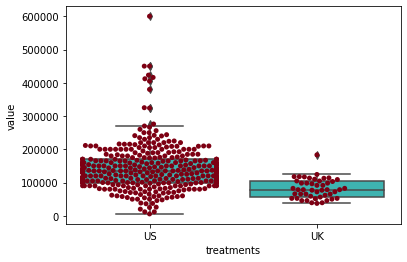

                     sum_sq     df          F        PR(>F)
C(treatments)  1.619847e+11    1.0  36.604947  3.327237e-09
Residual       1.770085e+12  400.0        NaN           NaN


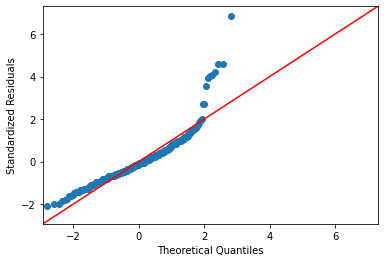

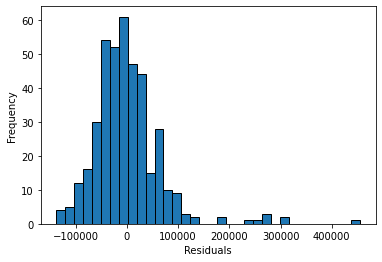

Shapiro-Wilk
0.8594149351119995 1.4964850164063016e-18
Bartlett
                 Parameter    Value
0      Test statistics (T)  39.3094
1  Degrees of freedom (Df)   1.0000
2                  p value   0.0000
Levene
                 Parameter    Value
0      Test statistics (W)  10.0711
1  Degrees of freedom (Df)   1.0000
2                  p value   0.0016
Tukey Procedure
  group1 group2          Diff         Lower         Upper   q-value  p-value
0     US     UK  62472.219419  42172.913221  82771.525617  8.556278    0.001


In [63]:
country_melt = split_country(raw_data)
runOneWayAnova(country_melt, checkAssumptions=True)

Major problems with the assumptions here as well as the amount of data being compared. There is a significant difference between the US and UK in salary. But looking at the boxplots I don't know that it comes from anything substantial. There is so much more data in the US column that its hard for me to think that this is a conclusive answer.

# Two Way Anova <a class="anchor" id="chapter6"></a>

What is the interaction between career type and the other factors like experience and remote level?

# Remote Ratio and Career

In [64]:
d_melt = pd.melt(us_2022, id_vars=['remote_ratio_c'], value_vars=['ds_usd_salary', 'de_usd_salary', 'da_usd_salary', 'ml_usd_salary'])
d_melt.columns = ['remote', 'job', 'value']
d_melt.head()

,remote,job,value
0,100.0,ds_usd_salary,NaN
1,100.0,ds_usd_salary,NaN
2,100.0,ds_usd_salary,NaN
3,0.0,ds_usd_salary,130000.0
4,0.0,ds_usd_salary,90000.0


In [65]:
d_melt.remote.value_counts()

100.0    664
0.0      216
Name: remote, dtype: int64

<AxesSubplot:xlabel='remote', ylabel='value'>

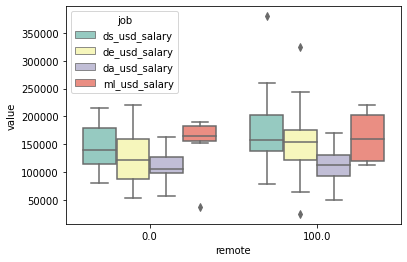

In [66]:
sns.boxplot(x="remote", y="value", hue="job", data=d_melt, palette="Set3") 

In [67]:
def runTwoWayAnova(d_melt, var1, var2, checkAssumptions=False):
    
    # Ordinary Least Squares (OLS) model
    model = ols(f'value ~ C({var1}) + C({var2}) + C({var1}):C({var2})', data=d_melt).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_table
    
    #ANOVA SUMMARY
    res = stat()
    res.anova_stat(df=d_melt, res_var='value', anova_model=f'value~C({var1})+C({var2})+C({var1}):C({var2})')
    print("Main Effect")
    res.anova_summary
    
    #INTERACTION PLOT
    fig = interaction_plot(x=d_melt[var1], trace=d_melt[var2], response=d_melt['value'])
    plt.show()
    
    if checkAssumptions:
        # QQ-plot
        sm.qqplot(res.anova_std_residuals, line='45')
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Standardized Residuals")
        plt.show()

        # histogram
        plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
        plt.xlabel("Residuals")
        plt.ylabel('Frequency')
        plt.show()
        
        #Check Residuals
        w, pvalue = stats.shapiro(res.anova_model_out.resid)
        print("Shapiro-Wilk")
        print(w, pvalue)
        
        #Check Variances (Bartlett)
        res = stat()
        res.bartlett(df=d_melt, res_var='value', xfac_var=[var1, var2])
        print("Bartlett")
        print(res.bartlett_summary)
        
        #Check Variances (Levene)
        res = stat()
        res.levene(df=d_melt, res_var='value', xfac_var=[var1, var2])
        print("Levene")
        print(res.levene_summary)

    
    #Differences for Var1
    res = stat()
    res.tukey_hsd(df=d_melt, res_var='value', xfac_var=var1, anova_model=f'value~C({var1})+C({var2})+C({var1}):C({var2})')
    print(f"Effect of {var1}")
    print(res.tukey_summary)
    
    #Differences for Var2
    res = stat()
    res.tukey_hsd(df=d_melt, res_var='value', xfac_var=var2, anova_model=f'value~C({var1})+C({var2})+C({var1}):C({var2})')
    print(f"Effect of {var2}")
    print(res.tukey_summary)
    
    #Differences between Var1 and Var2
    res.tukey_hsd(df=d_melt, res_var='value', xfac_var=[var1,var2], anova_model=f'value ~ C({var1}) + C({var2}) + C({var1}):C({var2})')
    print("Variable Interaction")
    print(res.tukey_summary.head())

Main Effect


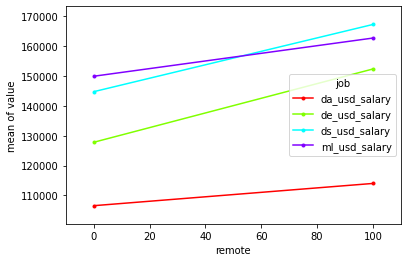

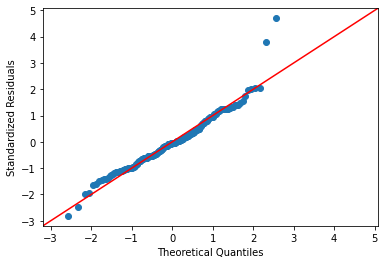

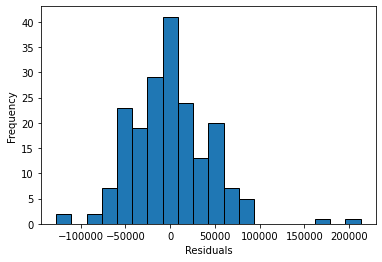

Shapiro-Wilk
0.9599421620368958 2.6032143068732694e-05
Bartlett
                 Parameter    Value
0      Test statistics (T)  20.7511
1  Degrees of freedom (Df)   7.0000
2                  p value   0.0042
Levene
                 Parameter   Value
0      Test statistics (W)  1.6129
1  Degrees of freedom (Df)  7.0000
2                  p value  0.1340
Effect of remote
   group1  group2          Diff       Lower         Upper   q-value  p-value
0     0.0   100.0  15319.593385  573.683124  30065.503646  2.898503  0.04181
Effect of job
          group1         group2          Diff         Lower         Upper  \
0  ds_usd_salary  de_usd_salary  14275.500000  -6798.273418  35349.273418   
1  ds_usd_salary  da_usd_salary  48936.578947  27245.709836  70627.448059   
2  ds_usd_salary  ml_usd_salary   4447.846154 -31428.747737  40324.440044   
3  de_usd_salary  da_usd_salary  34661.078947  13302.992195  56019.165700   
4  de_usd_salary  ml_usd_salary   9827.653846 -25848.725680  45504.033372  

In [68]:
runTwoWayAnova(d_melt,'remote', 'job', checkAssumptions=True)

We don't see any significant results here but the interaction plot shows a slight increase across the board with remote work for all four career types considered. There is also an interesting overlap between data science and machine learning engineering indicating that those could be consdidered at a similar level based on salary distribution. Levene's p-value is promising that there the distributions are comparable in this test.

# Experience Level and Career

In [69]:
#Create data for two way anova on job and experience
d_melt = pd.melt(us_only, id_vars=['experience_level'], value_vars=['ds_usd_salary', 'de_usd_salary', 'da_usd_salary'])
d_melt.columns = ['exp', 'job', 'value']

Main Effect


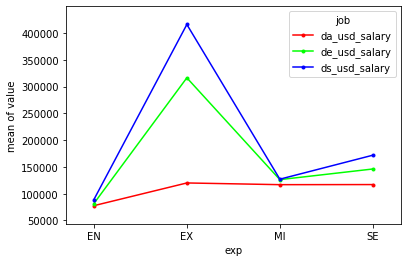

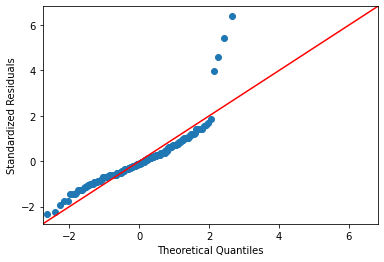

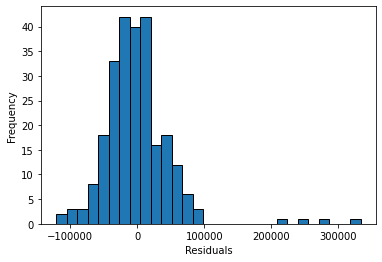

Shapiro-Wilk
0.8300015330314636 7.505026903050361e-16
Bartlett
                 Parameter  Value
0      Test statistics (T)    NaN
1  Degrees of freedom (Df)   11.0
2                  p value    NaN
Levene
                 Parameter    Value
0      Test statistics (W)   2.5952
1  Degrees of freedom (Df)  11.0000
2                  p value   0.0039
Effect of exp
  group1 group2           Diff          Lower          Upper    q-value  \
0     MI     SE   22865.022772    2365.416166   43364.629379   4.081347   
1     MI     EN   41584.050847    6673.123143   76494.978552   4.358558   
2     MI     EX  156240.949153  105406.836184  207075.062121  11.246492   
3     SE     EN   64449.073620   32481.800429   96416.346811   7.377149   
4     SE     EX  133375.926380   84516.528888  182235.323873   9.988650   
5     EN     EX  197825.000000  141382.288109  254267.711891  12.824805   

    p-value  
0  0.022002  
1  0.012233  
2  0.001000  
3  0.001000  
4  0.001000  
5  0.001000  
Effect of jo

In [70]:
runTwoWayAnova(d_melt,'exp', 'job', checkAssumptions=True)

This one is really interesting to me for a few reasons. First, we get a signficant interaction term between mid and senior experience for data science. This could indicate that the mid-senior jump in data science is more substantial than the other two careers considered. The other reason is the interaction plot. Notice how executive experience raises salary in data science and engineering but not data anlytics. Odd. It doesn't appear that experience level is helping data analysts. Assumptions here are all significant which means that the results have to be potentially thrown out altogether.

# Company Size and Career

In [71]:
d_melt = pd.melt(us_2022, id_vars=['company_size'], value_vars=['ds_usd_salary', 'de_usd_salary', 'da_usd_salary', 'ml_usd_salary'])
d_melt.columns = ['size', 'job', 'value']

Main Effect


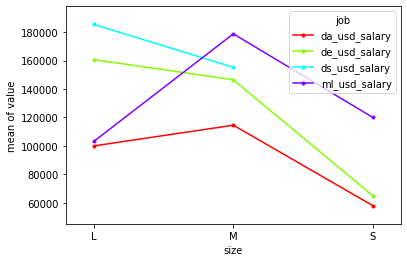

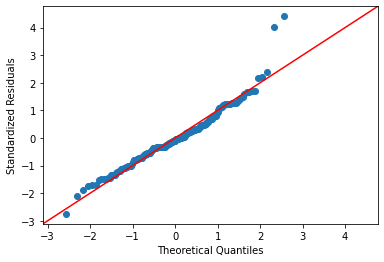

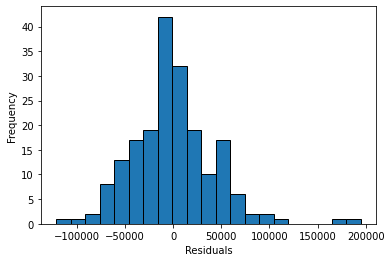

Shapiro-Wilk
0.9579484462738037 1.6070132915046997e-05
Bartlett
                 Parameter  Value
0      Test statistics (T)    NaN
1  Degrees of freedom (Df)   11.0
2                  p value    NaN
Levene
                 Parameter  Value
0      Test statistics (W)    NaN
1  Degrees of freedom (Df)   11.0
2                  p value    NaN
Effect of size
  group1 group2          Diff         Lower          Upper   q-value   p-value
0      M      L  22883.779116    102.157849   45665.400383  3.356924  0.048705
1      M      S  65126.054217  12341.371784  117910.736649  4.123303  0.011090
2      L      S  88009.833333  31670.605395  144349.061272  5.220580  0.001000
Effect of job
          group1         group2          Diff         Lower         Upper  \
0  ds_usd_salary  de_usd_salary  14275.500000  -6293.897486  34844.897486   
1  ds_usd_salary  da_usd_salary  48936.578947  27764.855225  70108.302669   
2  ds_usd_salary  ml_usd_salary   4447.846154 -30570.083742  39465.776050   
3  d

In [72]:
runTwoWayAnova(d_melt,'size', 'job', checkAssumptions=True)

In [73]:
#No small data science careers here
us_2022[(us_2022['company_size'] == 'S') & (us_2022['job_title_clean'] == 'Data Science')].head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_clean,ds_usd_salary,de_usd_salary,da_usd_salary,ml_usd_salary,ma_usd_salary,remote_ratio_c


Main Effect


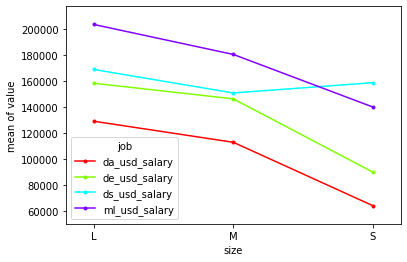

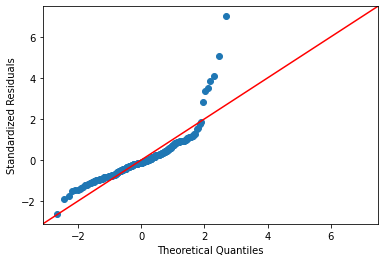

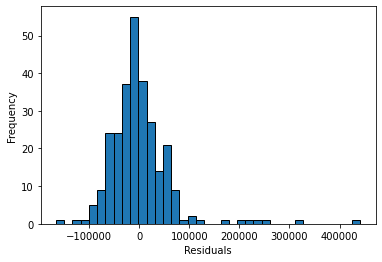

Shapiro-Wilk
0.8132916688919067 1.4861854804066742e-17
Bartlett
                 Parameter     Value
0      Test statistics (T)  112.7348
1  Degrees of freedom (Df)   11.0000
2                  p value    0.0000
Levene
                 Parameter    Value
0      Test statistics (W)   1.9880
1  Degrees of freedom (Df)  11.0000
2                  p value   0.0298
Effect of size
  group1 group2          Diff         Lower         Upper   q-value   p-value
0      L      M  25067.458261   4721.831863  45413.084659  4.107060  0.011104
1      L      S  45053.146667   6073.731702  84032.561631  3.852845  0.018777
2      M      S  19985.688406 -16691.095562  56662.472373  1.816434  0.406844
Effect of job
          group1         group2          Diff         Lower          Upper  \
0  ds_usd_salary  de_usd_salary   8605.313953 -16237.278175   33447.906082   
1  ds_usd_salary  da_usd_salary  44444.232260  18972.614203   69915.850317   
2  ds_usd_salary  ml_usd_salary  23876.769165 -12060.018279   

In [74]:
d_melt = pd.melt(us_only, id_vars=['company_size'], value_vars=['ds_usd_salary', 'de_usd_salary', 'da_usd_salary', 'ml_usd_salary'])
d_melt.columns = ['size', 'job', 'value']
runTwoWayAnova(d_melt,'size', 'job', checkAssumptions=True)

The first test above produced an odd result because there are no data science careers among small companies in the 2022 data. So I expanded that to all US data to see what the full picture looks like. The interaction plot from 2022 data makes it look like a machine learning enginner is better of at a mid size company. The second test confirms that all data careers generally make more at larger companies (expected). But the data science line could indicate that a small company could be a good move too! Note that the assumption tests here all fail. But the interaction plot is a really interesting find.

# Conclusions <a id="chapter7"></a>

Lets start with the list of questions I had in the beginning:

- Am I being underpaid? 

Technically I am far below the average of about 156k annually. However, the distribution of data science salaries had a standard deviation of approximately 64k. I am well within one standard deviation of the mean. Could I use this as leverage to make more money? I also showed that the data science and engineering careers are influenced by seniority level. Am I being underpaid as a data scientist in general? Not necessarily. But as a Sr. Data Scientist? I am currently below the 25th percentile. This could be good evidence for a request for a raise!


- Are there data careers that are more lucrative than others?

This was one of my biggest questions. Are Data Science/Data Engineering/Data Analytics similar in salary? The answer that was consistent throughout the tests was a definite no. The one way anova test showed that data anlytics underperforms the other two by quite a bit. The two way anova showed that experience level had almost no effect on analytics salaries. The interaction plot from the remote vs job title anova test also showed that data science and machine learning engineering are at the top of the pyramid with salary level. 

- What effect does remote work have on salary? 

It was clear to see that remote work became much more popular in 2021 and 2022. The interaction plots also showed that going remote resulted in higher salaries for data science/engineering/analytics but not necessarily for machine learning engineering. But we also saw from the one way tests that salary levels between remote and in-person were not significantly different in the distributions for both the 2022 isolated and all us data.

- Is there a difference between the US and the UK? 

There is not enough data in 2022 to really jump to any conclusions about the differences between the two countries.

- What opportunities for advancement should I seek as a data scientist?

As a senior data scientist, I should definitely not switch to data anlytics. I could probably jump to data engineering and have a similar salary. But by going into either management or machine learning engineering would appear to have the best chance for advancement in pay.


- What comes next?

One thing to keep in mind is that, based on my professional experience, companies can have very wide range of definitions of a 'data scientist' or 'data analyst' or 'data engineer' etcd. Hence so many unique career names in this data set. I would like to spend some more time looking at the job titles and evaluating my assignment I used for these tests. I'd also like to see how different clustering algorithms can yield some insight here. Are there attributes in this small dataset that can separate the different careers? Could be interesting!

I'm curious what your thoughts are! I welcome any feedback :-)